In [151]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
from IPython.display import clear_output

import sys
env = gym.make("CartPole-v0")

In [144]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

print(device)

cuda:0


In [145]:
#Hyperparameters
episodes = 1000
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
update_target = 25
max_steps = 200
PATH = "./saved_models/model"

In [146]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 300),
            nn.ReLU(),
            nn.Linear(300, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [147]:

model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
model.to(device)
target = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
target.to(device)

opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

In [148]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [149]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1).to(device)

    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32).to(device)
    
    reward = torch.from_numpy(np.array(reward)).to(device)
    done = torch.from_numpy(np.array(done)).long().to(device)
    action = torch.from_numpy(np.array(action)).type(torch.int64).to(device)
    
    q_values = model(state)
    next_q_values = target(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1))
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = ((reward + gamma*max_next_q_values*(1-done) - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss

frame_index =  0


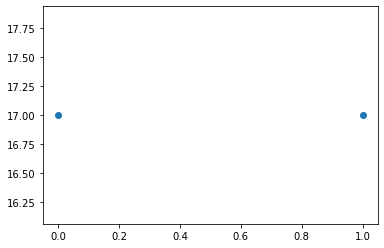

frame_index =  16
frame_index =  39
frame_index =  53
frame_index =  63
frame_index =  94
frame_index =  103
frame_index =  136
frame_index =  155
frame_index =  165
frame_index =  200
frame_index =  223
frame_index =  246
frame_index =  286
frame_index =  307
frame_index =  319
frame_index =  333
frame_index =  347
frame_index =  360
frame_index =  387
frame_index =  406
frame_index =  415
frame_index =  477
frame_index =  494
frame_index =  568
frame_index =  632
frame_index =  646
frame_index =  665
frame_index =  675
frame_index =  686
frame_index =  698
frame_index =  747
frame_index =  763
frame_index =  780
frame_index =  849
frame_index =  861
frame_index =  873
frame_index =  897
frame_index =  913
frame_index =  933
frame_index =  948
frame_index =  970
frame_index =  995
frame_index =  1018
frame_index =  1045
frame_index =  1095
frame_index =  1117
frame_index =  1157
frame_index =  1183
frame_index =  1211
frame_index =  1240
frame_index =  1274
frame_index =  1285
frame_i

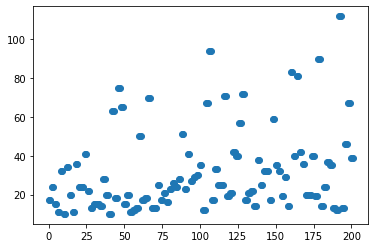

frame_index =  3108
frame_index =  3120
frame_index =  3128
frame_index =  3190
frame_index =  3298
frame_index =  3313
frame_index =  3340
frame_index =  3362
frame_index =  3450
frame_index =  3470
frame_index =  3550
frame_index =  3650
frame_index =  3705
frame_index =  3733
frame_index =  3752
frame_index =  3870
frame_index =  3895
frame_index =  3956
frame_index =  3985
frame_index =  4024
frame_index =  4215
frame_index =  4413
frame_index =  4425
frame_index =  4500
frame_index =  4544
frame_index =  4585
frame_index =  4713
frame_index =  4784
frame_index =  4823
frame_index =  4861
frame_index =  4971
frame_index =  5090
frame_index =  5289
frame_index =  5310
frame_index =  5505
frame_index =  5696
frame_index =  5727
frame_index =  5824
frame_index =  5944
frame_index =  6031
frame_index =  6074
frame_index =  6147
frame_index =  6346
frame_index =  6545
frame_index =  6605
frame_index =  6621
frame_index =  6717
frame_index =  6740
frame_index =  6939
frame_index =  7067


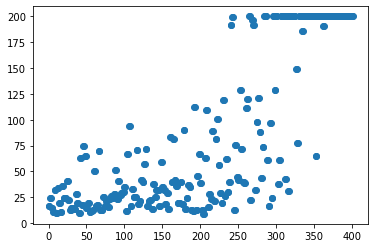

frame_index =  16258
frame_index =  16457
frame_index =  16656
frame_index =  16855
frame_index =  17054
frame_index =  17253
frame_index =  17452
frame_index =  17651
frame_index =  17850
frame_index =  18049
frame_index =  18248
frame_index =  18447
frame_index =  18646
frame_index =  18845
frame_index =  19044
frame_index =  19243
frame_index =  19442
frame_index =  19641
frame_index =  19840
frame_index =  20039
frame_index =  20238
frame_index =  20437
frame_index =  20636
frame_index =  20835
frame_index =  21034
frame_index =  21233
frame_index =  21432
frame_index =  21631
frame_index =  21830
frame_index =  22029
frame_index =  22228
frame_index =  22427
frame_index =  22626
frame_index =  22825
frame_index =  23024
frame_index =  23223
frame_index =  23422
frame_index =  23621
frame_index =  23820
frame_index =  24019
frame_index =  24218
frame_index =  24417
frame_index =  24616
frame_index =  24815
frame_index =  25014
frame_index =  25213
frame_index =  25412
frame_index =

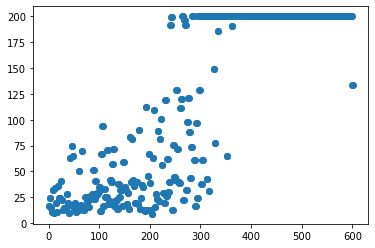

frame_index =  36092
frame_index =  36291
frame_index =  36490
frame_index =  36689
frame_index =  36888
frame_index =  37087
frame_index =  37286
frame_index =  37485
frame_index =  37684
frame_index =  37815
frame_index =  37950
frame_index =  38111
frame_index =  38310
frame_index =  38509
frame_index =  38708
frame_index =  38857
frame_index =  39056
frame_index =  39255
frame_index =  39454
frame_index =  39653
frame_index =  39852
frame_index =  39994
frame_index =  40193
frame_index =  40392
frame_index =  40591
frame_index =  40790
frame_index =  40989
frame_index =  41188
frame_index =  41387
frame_index =  41586
frame_index =  41785
frame_index =  41984
frame_index =  42183
frame_index =  42382
frame_index =  42581
frame_index =  42780
frame_index =  42979
frame_index =  43178
frame_index =  43377
frame_index =  43576
frame_index =  43775
frame_index =  43974
frame_index =  44173
frame_index =  44372
frame_index =  44571
frame_index =  44770
frame_index =  44969
frame_index =

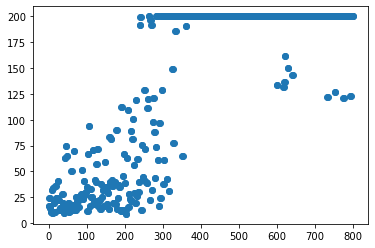

frame_index =  55408
frame_index =  55607
frame_index =  55806
frame_index =  56005
frame_index =  56204
frame_index =  56403
frame_index =  56602
frame_index =  56762
frame_index =  56912
frame_index =  57111
frame_index =  57310
frame_index =  57509
frame_index =  57708


KeyboardInterrupt: 

In [150]:
if os.path.exists(PATH):
    model.load_state_dict(torch.load(PATH))
    
else:
    frame_index = 0
    for i in range(episodes):
        print("frame_index = ", frame_index)
        state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)

        done = False
        steps = 0
        eps_rew = 0 
        eps_loss = 0

        while not done and steps<max_steps:
            if np.random.uniform(0,1)<eps:
                action = env.action_space.sample()
            else:
                action = torch.argmax(model(state.to(device))).cpu().detach().numpy()


            next_state, reward, done, info = env.step(action)
            replay_buffer.append((state, next_state, reward, done, action))
            if len(replay_buffer)>batch_size:
                loss = compute_td_loss(batch_size)

                eps_loss += loss.cpu().detach().numpy()
            eps = eps/(1 + decay_val)
            eps_rew += reward 
            if frame_index%update_target==0:
                target.load_state_dict(model.state_dict())
            
            
            if done:
                tot_rewards.append(eps_rew)
                break

            state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            steps += 1
            frame_index += 1
        tot_rewards.append(eps_rew)
        tot_loss.append(eps_loss)
        
        if(i%100)==0:
            plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
            plt.show()
    torch.save(model.state_dict(), PATH)

In [ ]:
plt.plot(tot_loss)

In [ ]:
#Plot
plt.plot(tot_rewards)

In [11]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(1000):
    
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()


c:\users\thoma\anaconda3\envs\custom_atari_env\lib\site-packages\gym\core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "
